In [76]:

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [77]:
#Membaca Dataset dari File ke Pandas dataFrame
kopiDataset = pd.read_csv('Coffee_production.csv', header=0)

In [78]:
kopiDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1990/91           55 non-null     float64
 1   1991/92           55 non-null     float64
 2   1992/93           55 non-null     float64
 3   1993/94           55 non-null     float64
 4   1994/95           55 non-null     float64
 5   1995/96           55 non-null     float64
 6   1996/97           55 non-null     float64
 7   1997/98           55 non-null     float64
 8   1998/99           55 non-null     float64
 9   1999/00           55 non-null     float64
 10  2000/01           55 non-null     float64
 11  2001/02           55 non-null     float64
 12  2002/03           55 non-null     float64
 13  2003/04           55 non-null     float64
 14  2004/05           55 non-null     float64
 15  2005/06           55 non-null     float64
 16  2006/07           55 non-null     float64
 17 

In [80]:

x = kopiDataset.iloc[:, :-1].values
y = kopiDataset.iloc[:, -1].values

In [81]:
#Mengubah kelas (kolom "Species") dari String ke Unique-Integer
kopiDataset["Coffee_type"] = pd.factorize(kopiDataset.Coffee_type)[0]

In [82]:
kopiDataset

,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,...,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production,Coffee_type
0,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,5.100000e+06,3.300000e+06,...,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06,8.208000e+07,0
1,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,8.280000e+06,9.480000e+06,...,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06,2.070000e+08,1
2,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,2.205660e+09,2.854680e+09,...,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10,0
3,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,2.952000e+07,2.106000e+07,...,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07,6.236400e+08,1
4,9.024000e+07,1.274400e+08,7.110000e+07,1.241400e+08,1.425600e+08,1.132800e+08,1.195800e+08,7.146000e+07,7.236000e+07,7.188000e+07,...,4.968000e+07,3.996000e+07,3.864000e+07,3.864000e+07,3.870000e+07,3.744000e+07,2.976000e+07,3.354000e+07,1.900380e+09,1
5,4.464600e+08,5.095800e+08,3.341400e+08,4.045800e+08,3.220800e+08,2.743800e+08,4.932600e+08,4.572600e+08,4.377600e+08,3.934200e+08,...,7.842000e+08,7.740600e+08,6.567600e+08,7.551000e+08,6.924600e+08,6.511200e+08,5.770800e+08,6.859800e+08,1.540488e+10,0
6,5.892000e+07,5.598000e+07,6.732000e+07,2.652000e+07,3.846000e+07,4.710000e+07,5.094000e+07,3.744000e+07,5.952000e+07,2.562000e+07,...,3.000000e+07,3.504000e+07,3.006000e+07,2.484000e+07,2.718000e+07,2.424000e+07,2.274000e+07,2.298000e+07,1.045560e+09,0
7,6.300000e+06,7.440000e+06,8.220000e+06,3.720000e+06,5.040000e+06,5.460000e+06,2.940000e+06,3.660000e+06,3.840000e+06,3.540000e+06,...,1.380000e+06,1.680000e+06,1.500000e+06,1.260000e+06,1.200000e+06,8.400000e+05,7.800000e+05,9.600000e+05,8.226000e+07,1
8,5.778000e+07,4.482000e+07,5.400000e+07,6.114000e+07,6.834000e+07,6.012000e+07,6.534000e+07,6.444000e+07,8.112000e+07,8.322000e+07,...,4.296000e+07,5.010000e+07,4.788000e+07,4.272000e+07,7.026000e+07,4.404000e+07,5.580000e+07,4.512000e+07,1.803120e+09,1
9,7.860000e+06,4.800000e+06,3.240000e+06,4.020000e+06,1.500000e+06,1.560000e+06,1.860000e+06,2.940000e+06,1.920000e+06,1.140000e+06,...,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,6.222000e+07,1


In [83]:
#Mengubah dataFrame ke array Numpy
kopiDataset = kopiDataset.to_numpy()

In [84]:
print(kopiDataset)

[[3.000000e+06 4.740000e+06 4.680000e+06 ... 3.120000e+06 8.208000e+07
  0.000000e+00]
 [7.380000e+06 6.240000e+06 7.200000e+06 ... 4.860000e+06 2.070000e+08
  1.000000e+00]
 [1.637160e+09 1.637580e+09 2.076180e+09 ... 3.492660e+09 7.508298e+10
  0.000000e+00]
 ...
 [6.732000e+07 5.646000e+07 7.290000e+07 ... 3.900000e+07 1.992780e+09
  1.000000e+00]
 [7.860000e+07 8.628000e+07 1.404000e+08 ... 1.829220e+09 2.880318e+10
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 5.460000e+06 1.909200e+08
  1.000000e+00]]


In [85]:
#Membagi Dataset => 80 baris data untuk training dan 20 baris data untuk testing
dataTraining = np.concatenate((kopiDataset[0:40, :], kopiDataset[50:90, :]), 
                              axis=0)
dataTesting = np.concatenate((kopiDataset[40:50, :], kopiDataset[90:100, :]), 
                             axis=0)

In [106]:

len(dataTraining)

45

In [107]:

len(dataTesting)

10

In [93]:
#Memecah Dataset ke Input dan Label
inputTraining = dataTraining[:, 0:4]
inputTesting = dataTesting[:, 0:4]
labelTraining = dataTraining[:, 4]
labelTesting = dataTesting[:, 4]

In [94]:
#Mendefinisikan Decision Tree Classifier
model = tree.DecisionTreeClassifier()

In [95]:
#Mentraining Model
model = model.fit(inputTraining, labelTraining)

In [96]:
#Memprediksi Input Data Testing
hasilPrediksi = model.predict(inputTesting)
print("Label Sebenarnya : ", labelTesting)
print("Hasil Prediksi : ", hasilPrediksi)

Label Sebenarnya :  [3.0000e+05 2.4954e+08 0.0000e+00 4.0980e+07 3.1200e+06 1.4880e+07
 4.3800e+06 2.5200e+06 8.3940e+07 1.0560e+07]
Hasil Prediksi :  [4.8000e+05 2.2722e+08 0.0000e+00 3.9840e+07 2.7000e+06 5.0400e+06
 2.7000e+06 1.5000e+06 4.0740e+07 1.5000e+07]


In [97]:
#Menghitung Akurasi
prediksiBenar = (hasilPrediksi == labelTesting).sum()
prediksiSalah = (hasilPrediksi != labelTesting).sum()
print("Prediksi Benar :", prediksiBenar, "data")
print("Prediksi Salah :", prediksiSalah, "data")
print("Akurasi :", prediksiBenar/(prediksiBenar+prediksiSalah) * 100, "%")

Prediksi Benar : 1 data
Prediksi Salah : 9 data
Akurasi : 10.0 %


In [99]:
#Mentraining Model Decision Tree
model = decisiontree.fit(x, y)

In [100]:

test = model.predict(x)

In [101]:
test

array(['Robusta', 'Arabica', 'Robusta', 'Arabica', 'Arabica', 'Robusta',
       'Robusta', 'Arabica', 'Arabica', 'Arabica', 'Arabica', 'Arabica',
       'Arabica', 'Arabica', 'Robusta', 'Arabica', 'Arabica', 'Arabica',
       'Robusta', 'Arabica', 'Arabica', 'Robusta', 'Robusta', 'Arabica',
       'Arabica', 'Robusta', 'Robusta', 'Arabica', 'Robusta', 'Arabica',
       'Robusta', 'Robusta', 'Arabica', 'Robusta', 'Robusta', 'Arabica',
       'Robusta', 'Arabica', 'Arabica', 'Robusta', 'Robusta', 'Arabica',
       'Arabica', 'Arabica', 'Robusta', 'Arabica', 'Robusta', 'Robusta',
       'Robusta', 'Robusta', 'Robusta', 'Robusta', 'Arabica', 'Robusta',
       'Arabica'], dtype=object)

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, test)
print(cm)

[[29  0]
 [ 0 26]]


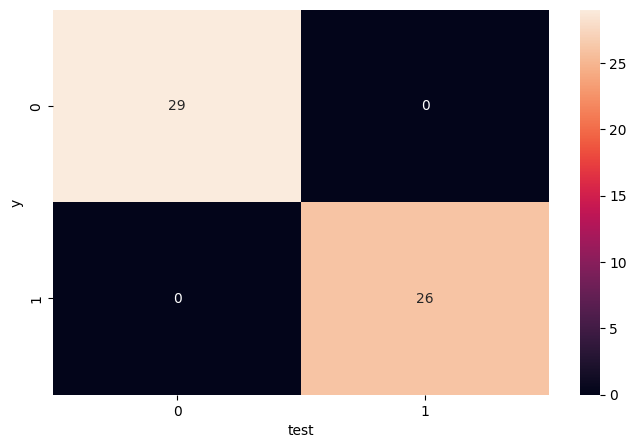

In [103]:

import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y, test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("test")
plt.ylabel("y")
plt.show()

In [104]:

from sklearn.metrics import classification_report
print (classification_report(y, test))

              precision    recall  f1-score   support

     Arabica       1.00      1.00      1.00        29
     Robusta       1.00      1.00      1.00        26

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



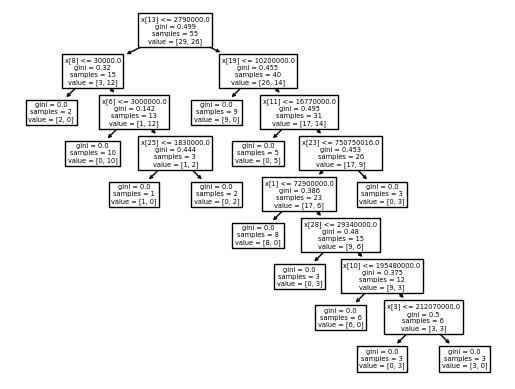

In [105]:

tree.plot_tree(decisiontree)
plt.show()

In [ ]:
# Decision Tree

In [108]:

#Memecah Dataset ke Input dan Label
inputTraining = dataTraining[:, 0:5]
inputTesting = dataTesting[:, 0:5]
labelTraining = dataTraining[:, 5]
labelTesting = dataTesting[:, 5]
     


In [109]:

#Mendefinisikan Decision Tree Classifier
model = tree.DecisionTreeClassifier()

In [110]:

#Mentraining Model
model = model.fit(inputTraining, labelTraining)

In [111]:
#Memprediksi Input Data Testing
hasilPrediksi = model.predict(inputTesting)
print("Label Sebenarnya : ", labelTesting)
print("Hasil Prediksi : ", hasilPrediksi)
     

Label Sebenarnya :  [3.000e+05 3.180e+08 0.000e+00 5.910e+07 3.180e+06 1.254e+07 2.640e+06
 2.160e+06 7.902e+07 5.040e+06]
Hasil Prediksi :  [7.2000e+05 2.4012e+08 0.0000e+00 3.0840e+07 2.5800e+06 6.4800e+06
 2.5800e+06 6.2400e+06 5.3820e+07 3.9600e+07]


In [112]:

#Menghitung Akurasi
prediksiBenar = (hasilPrediksi == labelTesting).sum()
prediksiSalah = (hasilPrediksi != labelTesting).sum()
print("Prediksi Benar :", prediksiBenar, "data")
print("Prediksi Salah :", prediksiSalah, "data")
print("Akurasi :", prediksiBenar/(prediksiBenar+prediksiSalah) * 100, "%")
   

Prediksi Benar : 1 data
Prediksi Salah : 9 data
Akurasi : 10.0 %
